### Here is the manual of the PyPI package Massfunc
#### First,we start with the useage of class,the package have four class,named CosmologySet, Mass_func, Collapse_fraction and SFRD respectively
#### The later classes inherit from all the previous class,so,you can just create the cosmo = SFRD() to use all the functions in in this package

In [ ]:
### Step 1. Import the package
import massfunc as mf


# Create an instance of the SFRD class
# This class inherits from CosmologySet, Mass_func, and Collapse_fraction
# It have 4 parameters: h=0.674, omegam=0.315, ns=0.965,sigma8=0.811

# You can set the cosmological parameters as this
cosmo = mf.SFRD(h=0.7, omegam=0.3, ns=1.0, sigma8=0.9)

# The `CosmologySet` data class will calculate the remaining parameters for you,such as `omegab`, `rhoc`, `rhom`, and `H0` etc.
print('------------------------------')
print(f'omegam: {cosmo.omegam}')
print(f'omegab: {cosmo.omegab}')
print(f'rhom: {cosmo.rhom}')
print(f'H0: {cosmo.H0u}')
print('------------------------------')

# If you want to use the default parameters of the cosmological parameters, you can just create an instance of the SFRD class without any parameters
cosmo_default = mf.SFRD()
print('------------------------------')
print(f'omegam: {cosmo_default.omegam}')
print(f'omegab: {cosmo_default.omegab}')
print(f'rhom: {cosmo_default.rhom}')
print(f'H0: {cosmo_default.H0u}')
print('------------------------------')

### By importing the package and instantiating the class,we gain access to the function in the `MassFunc` module

In [ ]:
# Here is the simple usage of the `Mass_func` class
import numpy as np
import matplotlib.pyplot as plt

dz = cosmo_default.Dz(10)  #the linear growth factor at redshift z=10
print('------------------------------')
print(f'Linear growth factor at z=10: {dz}')
print('------------------------------')

# The `sigma2_interpolation` method will calculate the linear matter power spectrum and the variance of the density field
M_h = np.logspace(0, 18, 100)  # Mass range from 10^8 to 10^16 solar masses
sigma2 = cosmo_default.sigma2_interpolation(M_h)   # The interpolation function will calculate fast
plt.figure(figsize=(10, 6),dpi=300)
plt.loglog(M_h, sigma2, label='Variance of density field')
plt.xlabel('Mass (M_sun)')
plt.ylabel('Sigma^2')
plt.title('Variance of Density Field')
plt.legend()


In [ ]:
# Here is the dsig2_dm and its interplotation
import matplotlib.pyplot as plt
import numpy as np

M_h = np.logspace(8, 16, 100)  # Mass range from 10^8 to 10^16 solar masses
dsig2_dm = abs(cosmo_default.dsig2dm_interpolation(M_h))  # The derivative of
# why use abs? Because the derivative is negative, it can't be log-log plot

plt.figure(figsize=(10, 6), dpi=300)
plt.loglog(M_h, dsig2_dm, label='dSigma^2/dM')
plt.xlabel('Mass (M_sun)')
plt.ylabel('dSigma^2/dM')
plt.title('Derivative of Variance of Density Field')
plt.legend()

In [ ]:
# Here is the plot of the mass function
import matplotlib.pyplot as plt
import numpy as np

M_h = np.logspace(8, 16, 100)  # Mass range from 10^8 to 10^16 solar masses
mf_ps = cosmo_default.dndmps(M_h,z=10)  # Calculate the P-S mass function
mf_st = cosmo_default.dndmst(M_h,z=10)  # Calculate the S-T mass function

plt.figure(figsize=(10, 6), dpi=300)
plt.loglog(M_h, mf_ps, label='Press-Schechter Mass Function', color='blue')
plt.loglog(M_h, mf_st, label='Sheth-Tormen Mass Function', color='orange')
plt.xlabel('Mass (M_sun)')
plt.ylabel('dN/dM')
plt.title('Mass Function Comparison')
plt.legend()

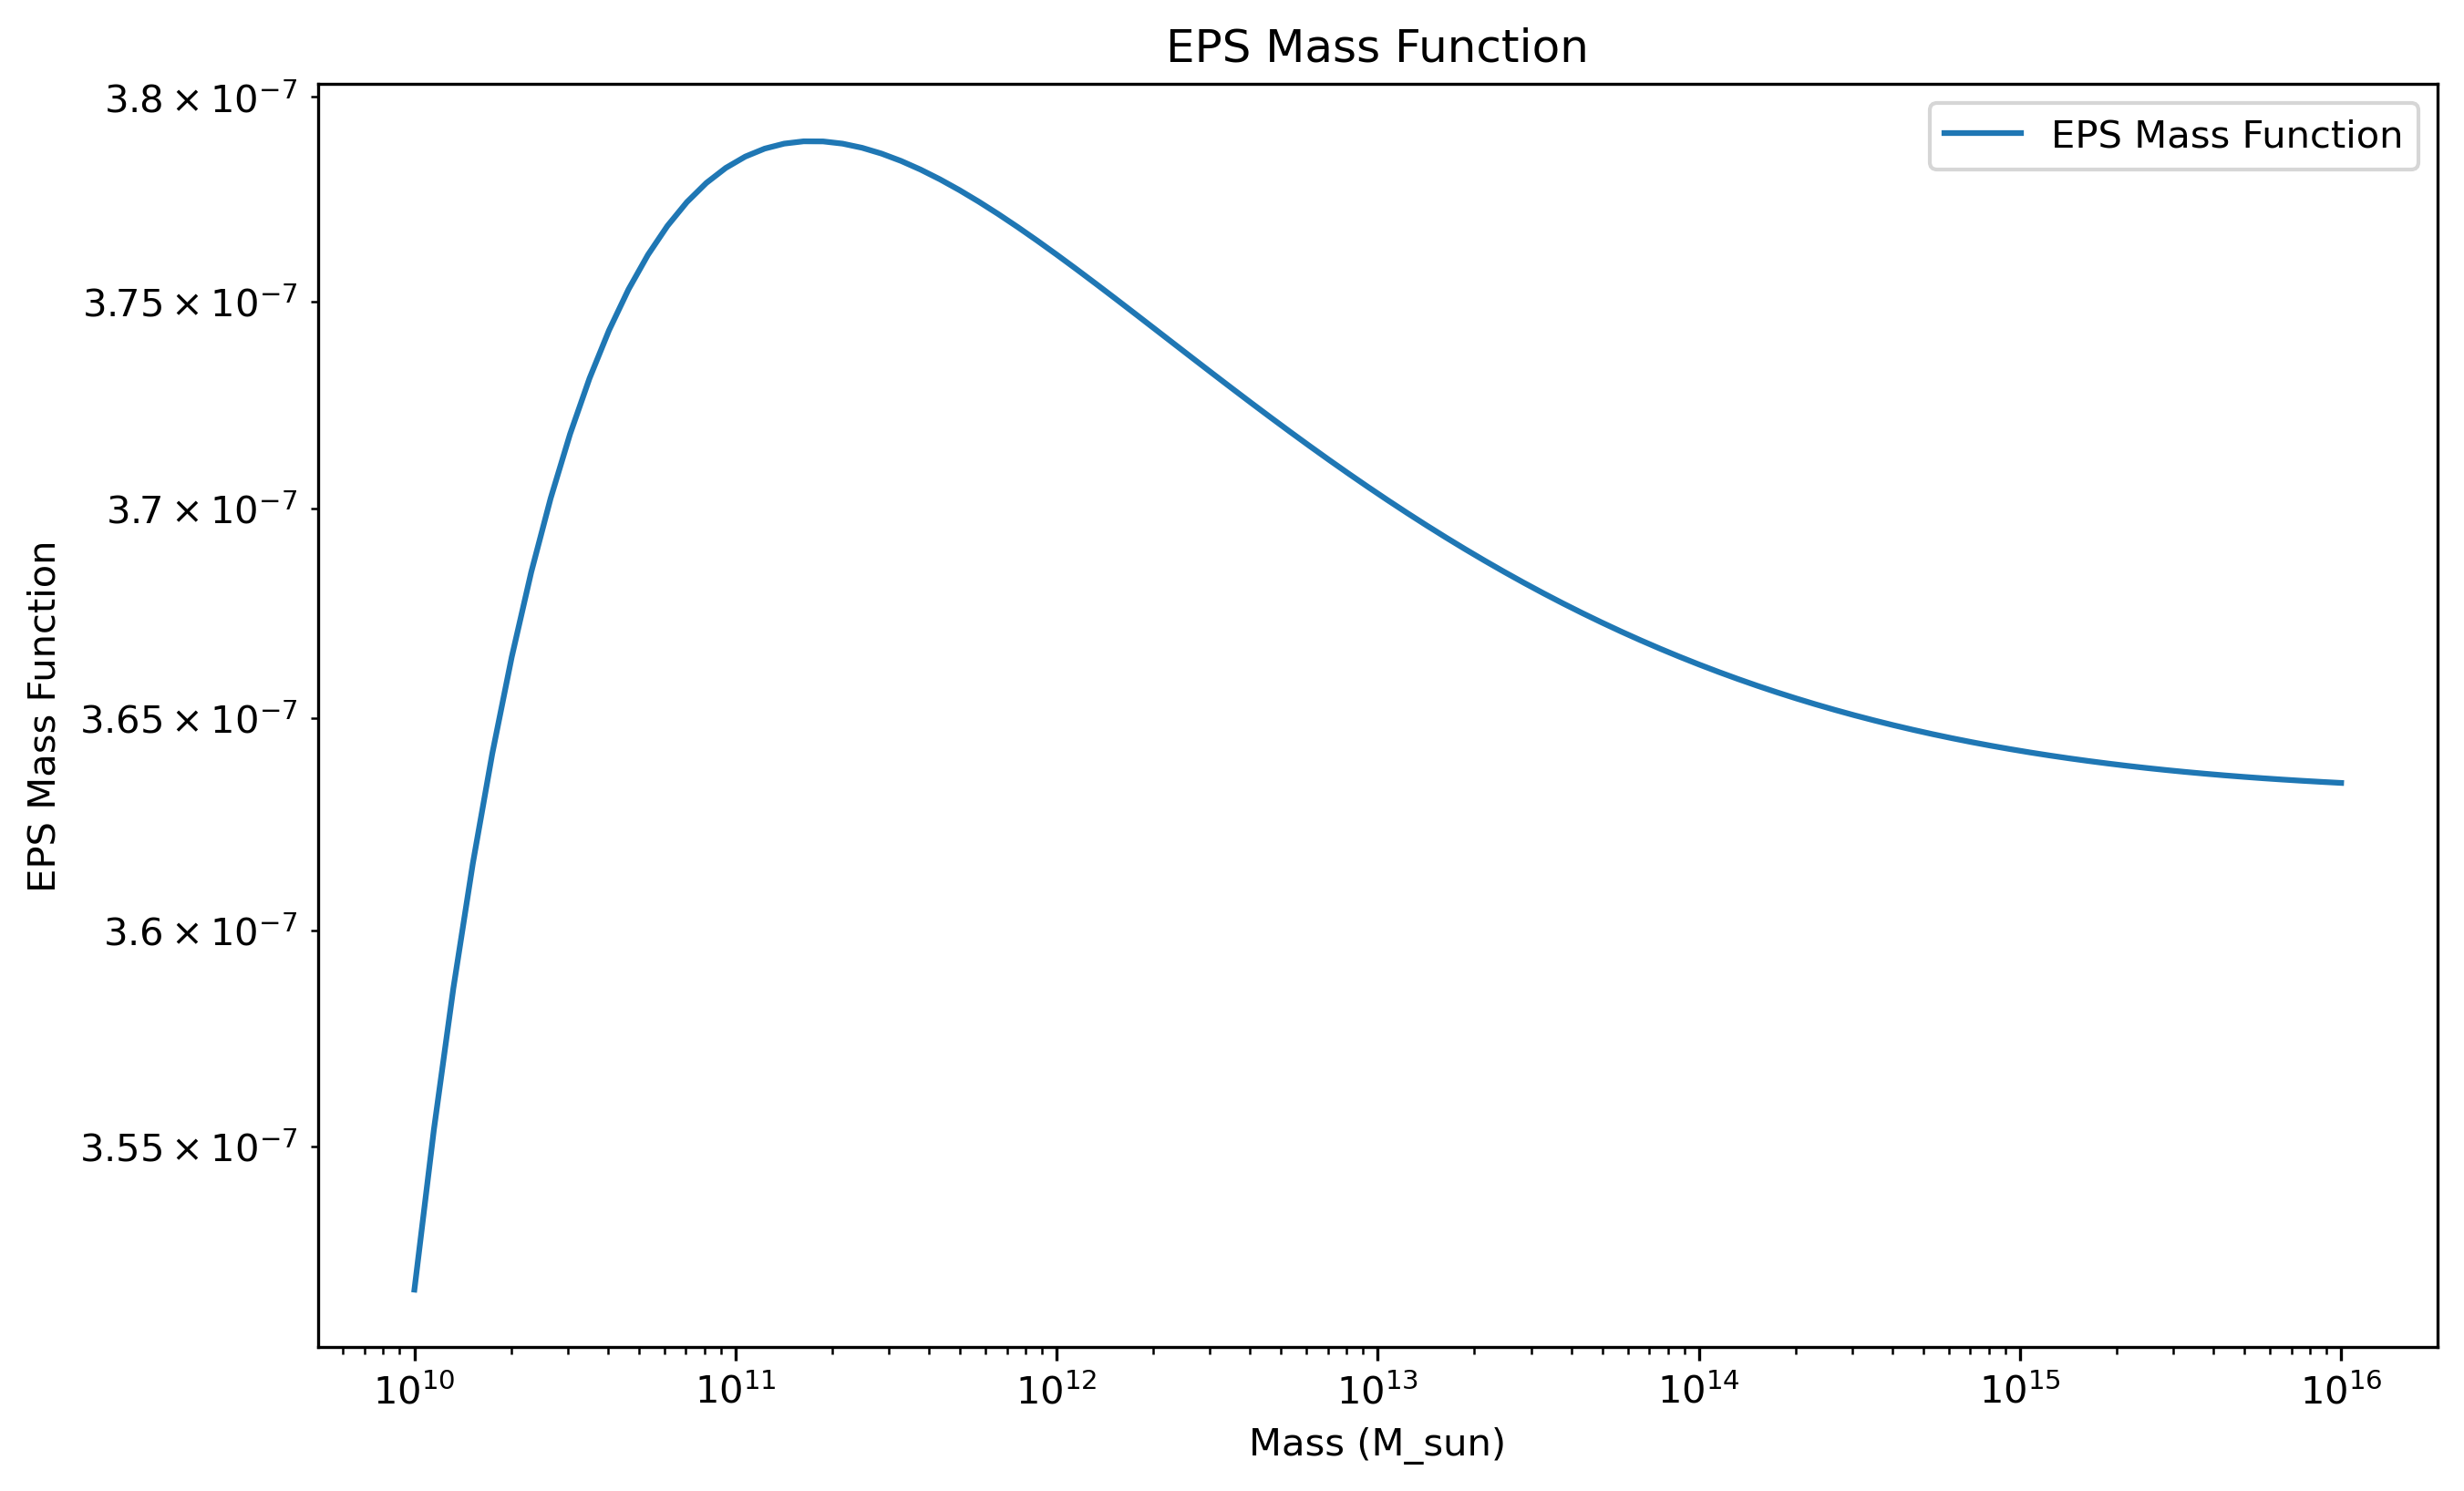

In [14]:
# Here is the eps plot
import matplotlib.pyplot as plt
import numpy as np

M_h = np.logspace(10, 16, 100)  # Mass range from 10^8 to 10^16 solar masses
M_min = cosmo_default.M_vir(0.61,1e4,10.0)  # Minimum mass at redshift z=10
eps = cosmo_default.dndmeps(M=M_min,Mr=M_h,deltar=1.0,z=10.0)  # Calculate the eps

plt.figure(figsize=(10, 6), dpi=300)
plt.loglog(M_h, eps, label='EPS Mass Function')
plt.xlabel('Mass (M_sun)')
plt.ylabel('EPS Mass Function')
plt.title('EPS Mass Function')
plt.legend()